In [1]:
# Install dependencies using pip in the docker container
import sys
!{sys.executable} -m pip install plotly pandas dataclasses_json stylecloud jieba 
!{sys.executable} -m pip install -U kaleido
# Done with installation, so the following code will be clean (without the dependencies output, and re-running all the time

In [1]:
from IPython.display import Image

# To run after editing, use shift+enter

##############################################################################################################

# import data structure
# coding

from cmath import sin
import customdatatypes
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import os
import stylecloud
import jieba

# Plot 
def show_image(path: str):
    display(Image(filename=f"{path}"))
    
def draw_audio_feature_of_all_songs_from_a_singer(singer: customdatatypes.Singer):
    print(f"draw_audio_feature_of_all_songs_from_a_singer {singer.name}")
    
    categories = [
        'acousticness',
        'danceability',
        'energy',
        'instrumentalness',
        'liveness',
        'speechiness',
        'valence'
    ]
    fig = go.Figure()

    for album in singer.albums:
        for track in album.tracks:
            fig.add_trace(go.Scatterpolar(
                r=[
                    track.acousticness,
                    track.danceability,
                    track.energy,
                    track.instrumentalness,
                    track.liveness,
                    track.speechiness,
                    track.valence
                ],
                theta=categories,
                fill='toself',
                name=f"{track.name}"
            ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 1]
            )),
        showlegend=False
    )

    fig.update_layout(title_text=f"{singer.name}")
    # fig.show()
    os.system(f"mkdir -p out/radar")
    fig.write_image(f"out/radar/{singer.name}.svg")
    
    # for jupyter, use png, due to performance reason
    fig.write_image(f"out/radar/{singer.name}.png")
    show_image(f"out/radar/{singer.name}.png")

def draw_audio_feature_of_all_albums_from_a_singer(singer: customdatatypes.Singer):
    print(f"draw_audio_feature_of_all_albums_from_a_singer {singer.name}")
    
    categories = [
        'acousticness',
        'danceability',
        'energy',
        'instrumentalness',
        'liveness',
        'speechiness',
        'valence'
    ]
    fig = go.Figure()

    for album in singer.albums:
        for track in album.tracks:
            fig.add_trace(go.Scatterpolar(
                r=[
                    track.acousticness,
                    track.danceability,
                    track.energy,
                    track.instrumentalness,
                    track.liveness,
                    track.speechiness,
                    track.valence
                ],
                theta=categories,
                fill='toself',
                name=f"{track.name}"
            ))

        print(f"draw_audio_feature_of_all_albums_from_a_singer {singer.name} {album.name}")
        fig.update_layout(
            polar=dict(
                radialaxis=dict(
                    visible=True,
                    range=[0, 1]
                )),
            showlegend=False
        )

        fig.update_layout(title_text=f"{singer.name} - {album.name}")
        # fig.show()
        os.system(f"mkdir -p \"out/{singer.name}\"")
        fig.write_image(f"out/{singer.name}/{album.name}.svg")
        
        # for jupyter, use png, due to performance reason
        fig.write_image(f"out/{singer.name}/{album.name}.svg")
        show_image(f"out/{singer.name}/{album.name}.svg")

def draw_word_cloud_for_english_singer(singer: customdatatypes.Singer):
    print(f"draw_word_cloud_for_english_singer {singer.name}")
    
    text = ""
    for album in singer.albums:
        for track in album.tracks:
            if len(track.lyrics) > 0:
                text += " " + track.lyrics

    os.system(f"mkdir -p \"out/word_cloud\"")
    name_split = singer.name.split(" ")
    english_stop_words = ['verse', 'lyrics', 'chorus', 'pre']
    english_stop_words += name_split
    stylecloud.gen_stylecloud(text=text,
                                icon_name='fas fa-horse',
                                palette='colorbrewer.diverging.Spectral_11',
                                custom_stopwords=english_stop_words,
                                background_color='black',
                                gradient='horizontal',
                                output_name=f"out/word_cloud/{singer.name}.png")
    show_image(path=f"out/word_cloud/{singer.name}.png")

def draw_word_cloud_for_chinese_singer(singer: customdatatypes.Singer):
    # https://blog.csdn.net/qq_42374697/article/details/106269448
    print(f"draw_word_cloud_for_chinese_singer {singer.name}")
    
    text = ""
    for album in singer.albums:
        for track in album.tracks:
            if len(track.lyrics) > 0:
                # print(" ".join(jieba.cut(track.lyrics)))
                text += " " + " ".join(jieba.cut(track.lyrics))

    os.system(f"mkdir -p \"out/word_cloud\"")
    name_split = singer.name.split(" ")
    english_stop_words = ['verse', 'lyrics', 'chorus', 'pre']
    english_stop_words += name_split
    stylecloud.gen_stylecloud(text=text,
                                icon_name='fas fa-horse',
                                palette='colorbrewer.diverging.Spectral_11',
                                font_path='NotoSansCJKsc-VF.otf', # https://github.com/googlefonts/noto-cjk/tree/main/Sans
                                custom_stopwords=english_stop_words,
                                background_color='black',
                                gradient='horizontal',
                                output_name=f"out/word_cloud/{singer.name}.png")
    show_image(path=f"out/word_cloud/{singer.name}.png")

def draw_audio_feature_change_over_time(singer: customdatatypes.Singer):
    print(f"draw_audio_feature_change_over_time {singer.name}")
    
    pass

def draw_unique_word_count(singers: list[customdatatypes.Singer]):
    print(f"draw_unique_word_count")
    
    pass

# Load data
english_singer_names = [
    "Taylor Swift",
    "Justin Bieber",
    "Sia",
    "Miley Cyrus",
]

chinese_singer_names = [
    "Jay Chou",
    "JJ Lin",
]

english_singers = []
for singer_name in english_singer_names:
    with open(f'data/{singer_name}.json', 'r') as infile:
        singer = customdatatypes.Singer.from_json(infile.read())
        english_singers.append(singer)

chinese_singers = []
for singer_name in chinese_singer_names:
    with open(f'data/{singer_name}.json', 'r') as infile:
        singer = customdatatypes.Singer.from_json(infile.read())
        chinese_singers.append(singer)

draw_audio_feature_of_all_songs_from_a_singer Taylor Swift


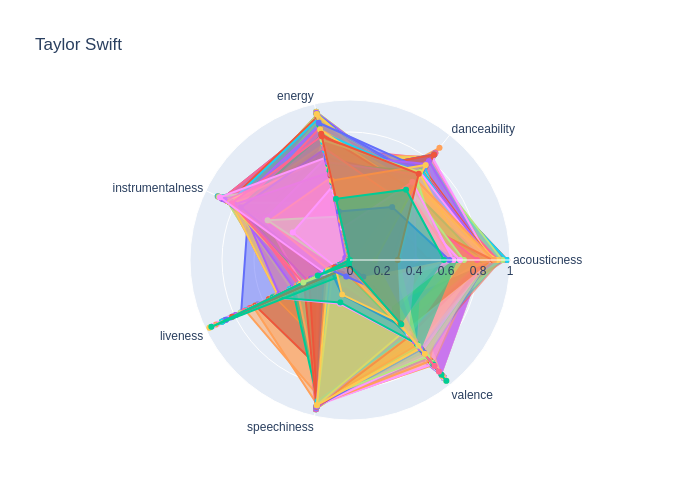

draw_audio_feature_of_all_songs_from_a_singer Justin Bieber


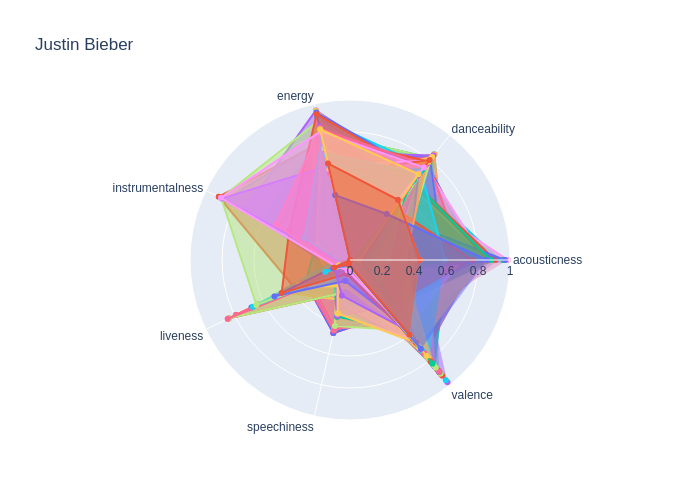

draw_audio_feature_of_all_songs_from_a_singer Sia


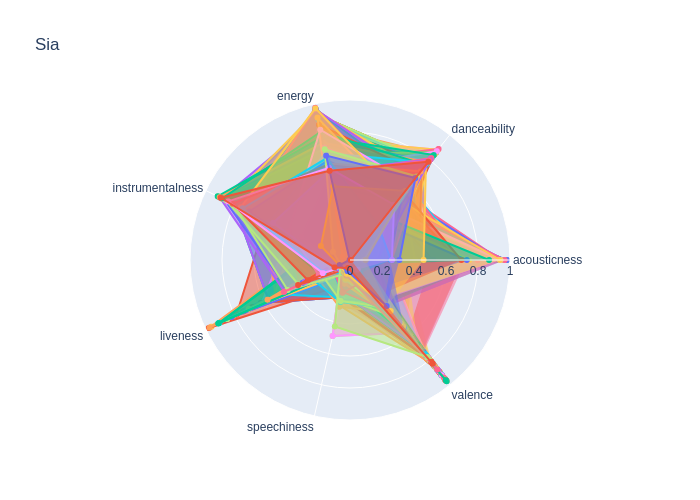

draw_audio_feature_of_all_songs_from_a_singer Miley Cyrus


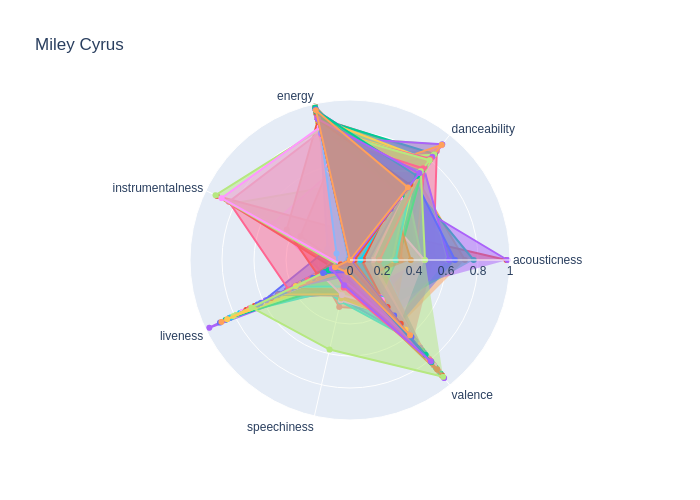

draw_audio_feature_of_all_songs_from_a_singer Jay Chou


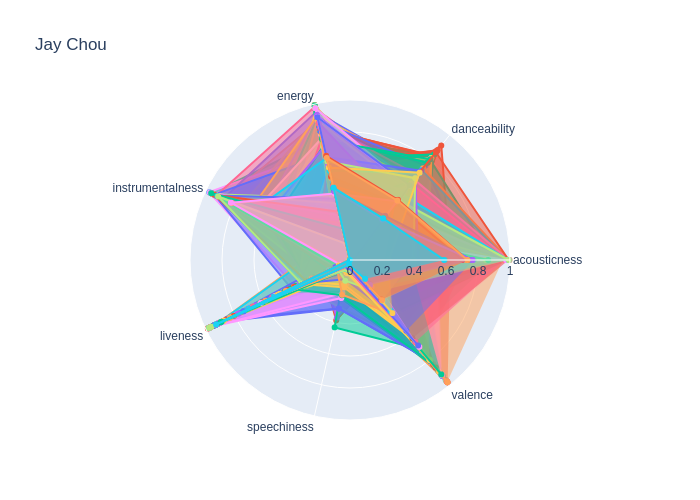

draw_audio_feature_of_all_songs_from_a_singer JJ Lin


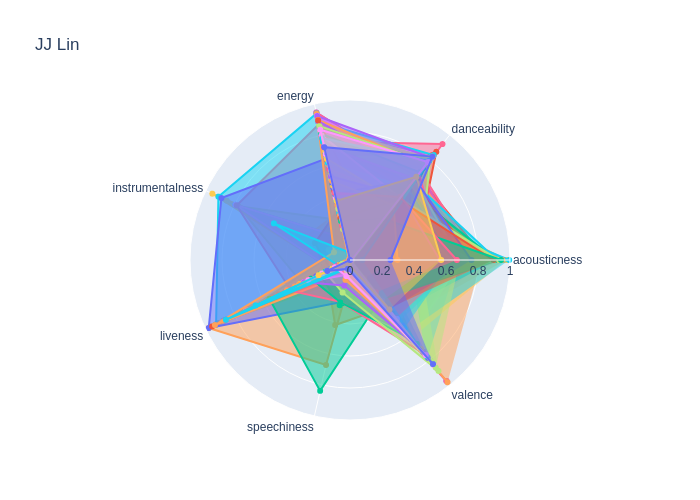

In [2]:
# audio features
for singer in english_singers:
    draw_audio_feature_of_all_songs_from_a_singer(singer=singer)
    # draw_audio_feature_of_all_albums_from_a_singer(singer=singer)

for singer in chinese_singers:
    draw_audio_feature_of_all_songs_from_a_singer(singer=singer)
    

draw_word_cloud_for_english_singer Taylor Swift


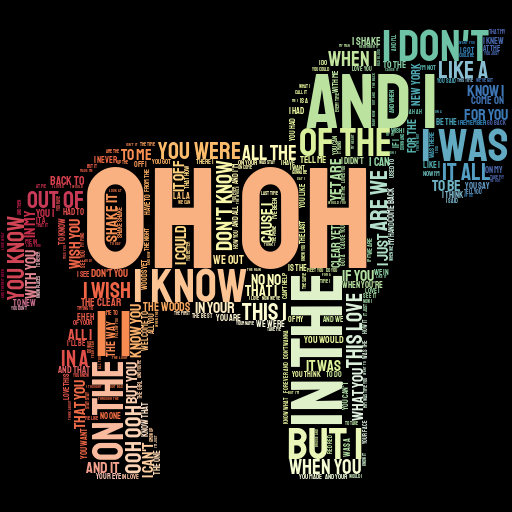

draw_word_cloud_for_english_singer Justin Bieber


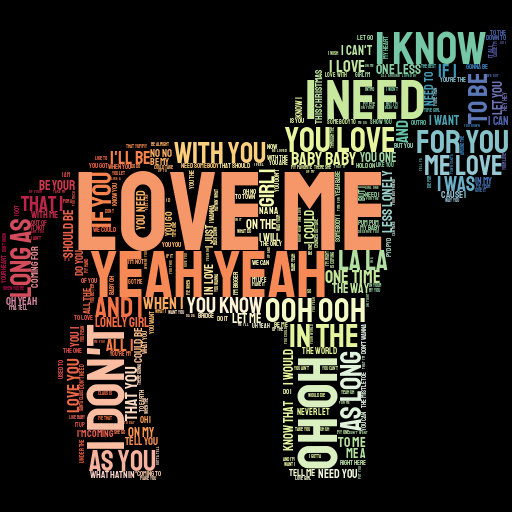

draw_word_cloud_for_english_singer Sia


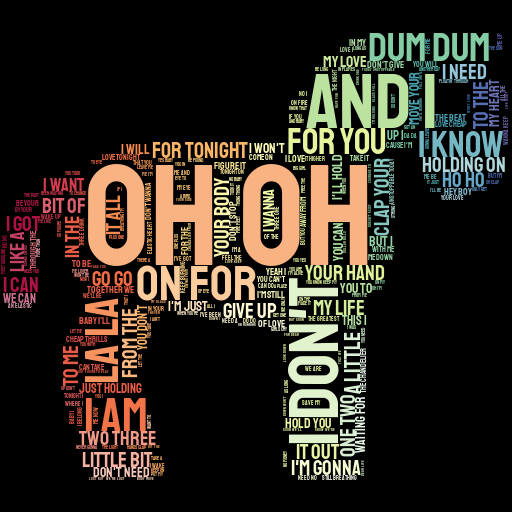

draw_word_cloud_for_english_singer Miley Cyrus


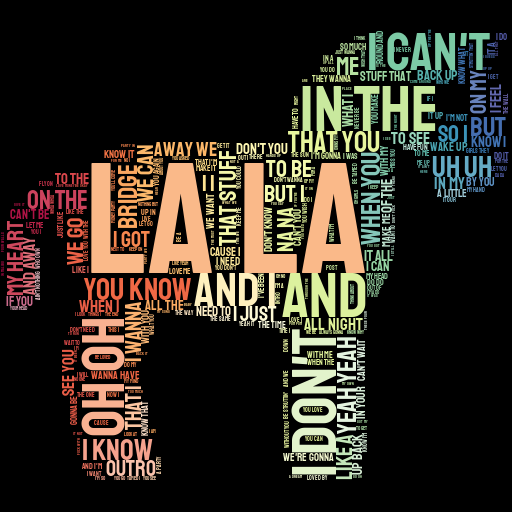

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache


draw_word_cloud_for_chinese_singer Jay Chou


Loading model cost 1.203 seconds.
Prefix dict has been built successfully.


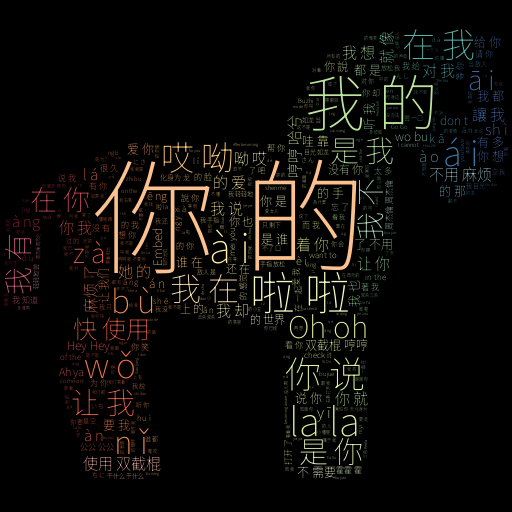

draw_word_cloud_for_chinese_singer JJ Lin


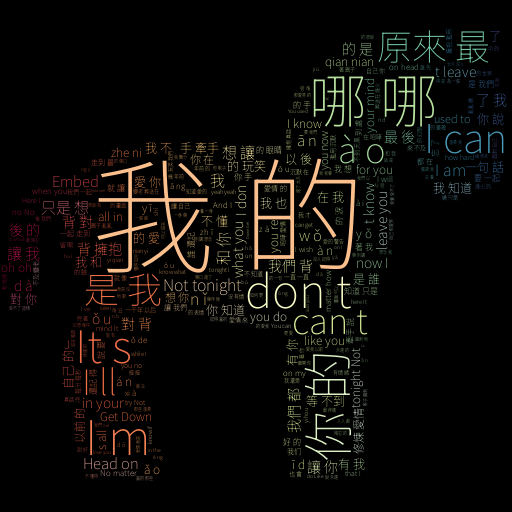

In [3]:
# word cloud
for singer in english_singers:
    draw_word_cloud_for_english_singer(singer=singer)

for singer in chinese_singers:
    draw_word_cloud_for_chinese_singer(singer=singer)
